In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
def generate():

    image = np.zeros(shape=(100, 200, 3))
    noise = np.random.randn(100, 200, 3)

    digits = np.random.choice(range(10), size=4, replace=False)
    labels = np.zeros(shape=(10))

    for idx, digit in enumerate(digits):

        size = np.random.randint(2, 5)
        color = np.random.rand(3) * 0.5 + 0.5
        thickness = np.random.randint(2, 5)

        x = idx * 50 + np.random.randint(0, 50 - size * 10)
        y = np.random.randint(size * 10, 100)

        image = cv2.putText(image, str(digit), (x, y), cv2.FONT_HERSHEY_PLAIN, size, color, thickness)
        labels[digit] = 1

    harshness = np.random.rand() * 0.5 + 0.1
    image = image + noise * harshness
    image = np.clip(image, 0, 1)
    image = image * 255
    image = image.astype('uint8')
    
    return image, digits, labels

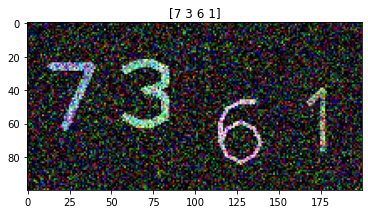

In [3]:
image, digits, labels = generate()

plt.imshow(image)
plt.title(digits)
plt.show()

In [4]:
labels

array([0., 1., 0., 1., 0., 0., 1., 1., 0., 0.])

In [5]:
while len([file for file in os.listdir('images/') if file.endswith('.jpg')]) < 1000:
    image, digits, labels = generate()
    cv2.imwrite(f'images/{digits[0]}{digits[1]}{digits[2]}{digits[3]}.jpg', image)

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt

files = os.listdir('images')
images = []
labels = []
for file in files:
    image = plt.imread('images/' + file) / 255
    label = np.array(list(map(int, file[:-4])))
    images.append(image)
    labels.append(label)
images = np.array(images, copy=False)
labels = np.array(labels, copy=False)